In [1]:
library(ggplot2)
library(glue)
library(cowplot)
library(stringr)
library(Rtsne)
library(Seurat)
library(uwot)
library(hexbin)
library(gridExtra)

Attaching SeuratObject

Loading required package: Matrix



In [51]:
plot_umaps <- function(filename) { 
  out =readRDS(filename)
    PCA_emb = out$embeddings
    state = out$max_continuums[,"State_1"]
    ct_labels = data.frame(out$ct_labels)
    colnames(ct_labels) = "ct_label"


    umap_out = umap(PCA_emb, n_neighbors=30L,metric = "cosine",n_components = 2L,learning_rate = 1,min_dist = 0.3,spread = 1,
    set_op_mix_ratio = 1,
    local_connectivity = 1L,
    repulsion_strength = 1,
    negative_sample_rate = 5,
    a = NULL,
    b = NULL,
    verbose = TRUE)

    options(repr.plot.width=35, repr.plot.height=12)
    p1 = ggplot(cbind(data.frame(umap_out), ct_labels ), aes(x=X1, y=X2, color=ct_label))+ geom_point(size=1)+theme_classic()+xlab("UMAP_1")+ylab("UMAP_2")+labs(colour="CT") + theme(text = element_text(size = 20)  )
    p1 = p1 + guides(color = guide_legend(override.aes = list(size = 6))) + scale_color_discrete(name = "Cell Type")
    # p2 = ggplot(cbind(data.frame(umap_out), data.frame(state) ), aes(x=X1, y=X2, color=state))+ geom_point(size=1)+theme_classic()+xlab("UMAP_1")+ylab("UMAP_2")+labs(colour="State Continuum") + theme(text = element_text(size = 16))  
    p3 = ggplot(cbind(data.frame(umap_out), data.frame(state) ), aes(x=X1, y = X2,z=state) ) +
          stat_summary_hex(fun = function(x) mean(x),bins = 5,binwidth=c(0.18,0.18)) +
          scale_fill_gradient2(low="red",  mid="gray", high="red",name = "State Continuum")+ ggtitle(glue('') )+theme_bw()+ theme(panel.border = element_blank(), panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"),legend.key.size = unit(1.5, "cm")) +xlab("UMAP_1")+ylab("")+labs(colour="State Continuum") + theme(text = element_text(size = 20))  
    # grid.arrange(p1, p2, p3, ncol=3)
    grid.arrange(p1, p3, ncol=2)

    
}

19:07:50 UMAP embedding parameters a = 0.9922 b = 1.112

19:07:50 Converting dataframe to numerical matrix

19:07:50 Read 20004 rows and found 30 numeric columns

19:07:50 Using Annoy for neighbor search, n_neighbors = 30

19:07:50 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:07:51 Writing NN index file to temp file /var/folders/1b/d3mmyllj1jg4btvm4vqztkdh0000gp/T//Rtmpnit1Eo/file3afc41411846

19:07:51 Searching Annoy index using 5 threads, search_k = 3000

19:07:53 Annoy recall = 100%

19:07:53 Commencing smooth kNN distance calibration using 5 threads
 with target n_neighbors = 30

19:07:54 Initializing from normalized Laplacian + noise (using irlba)

19:07:54 Commencing optimization for 200 epochs, with 1018326 positive edges

19:08:05 Optimization finished



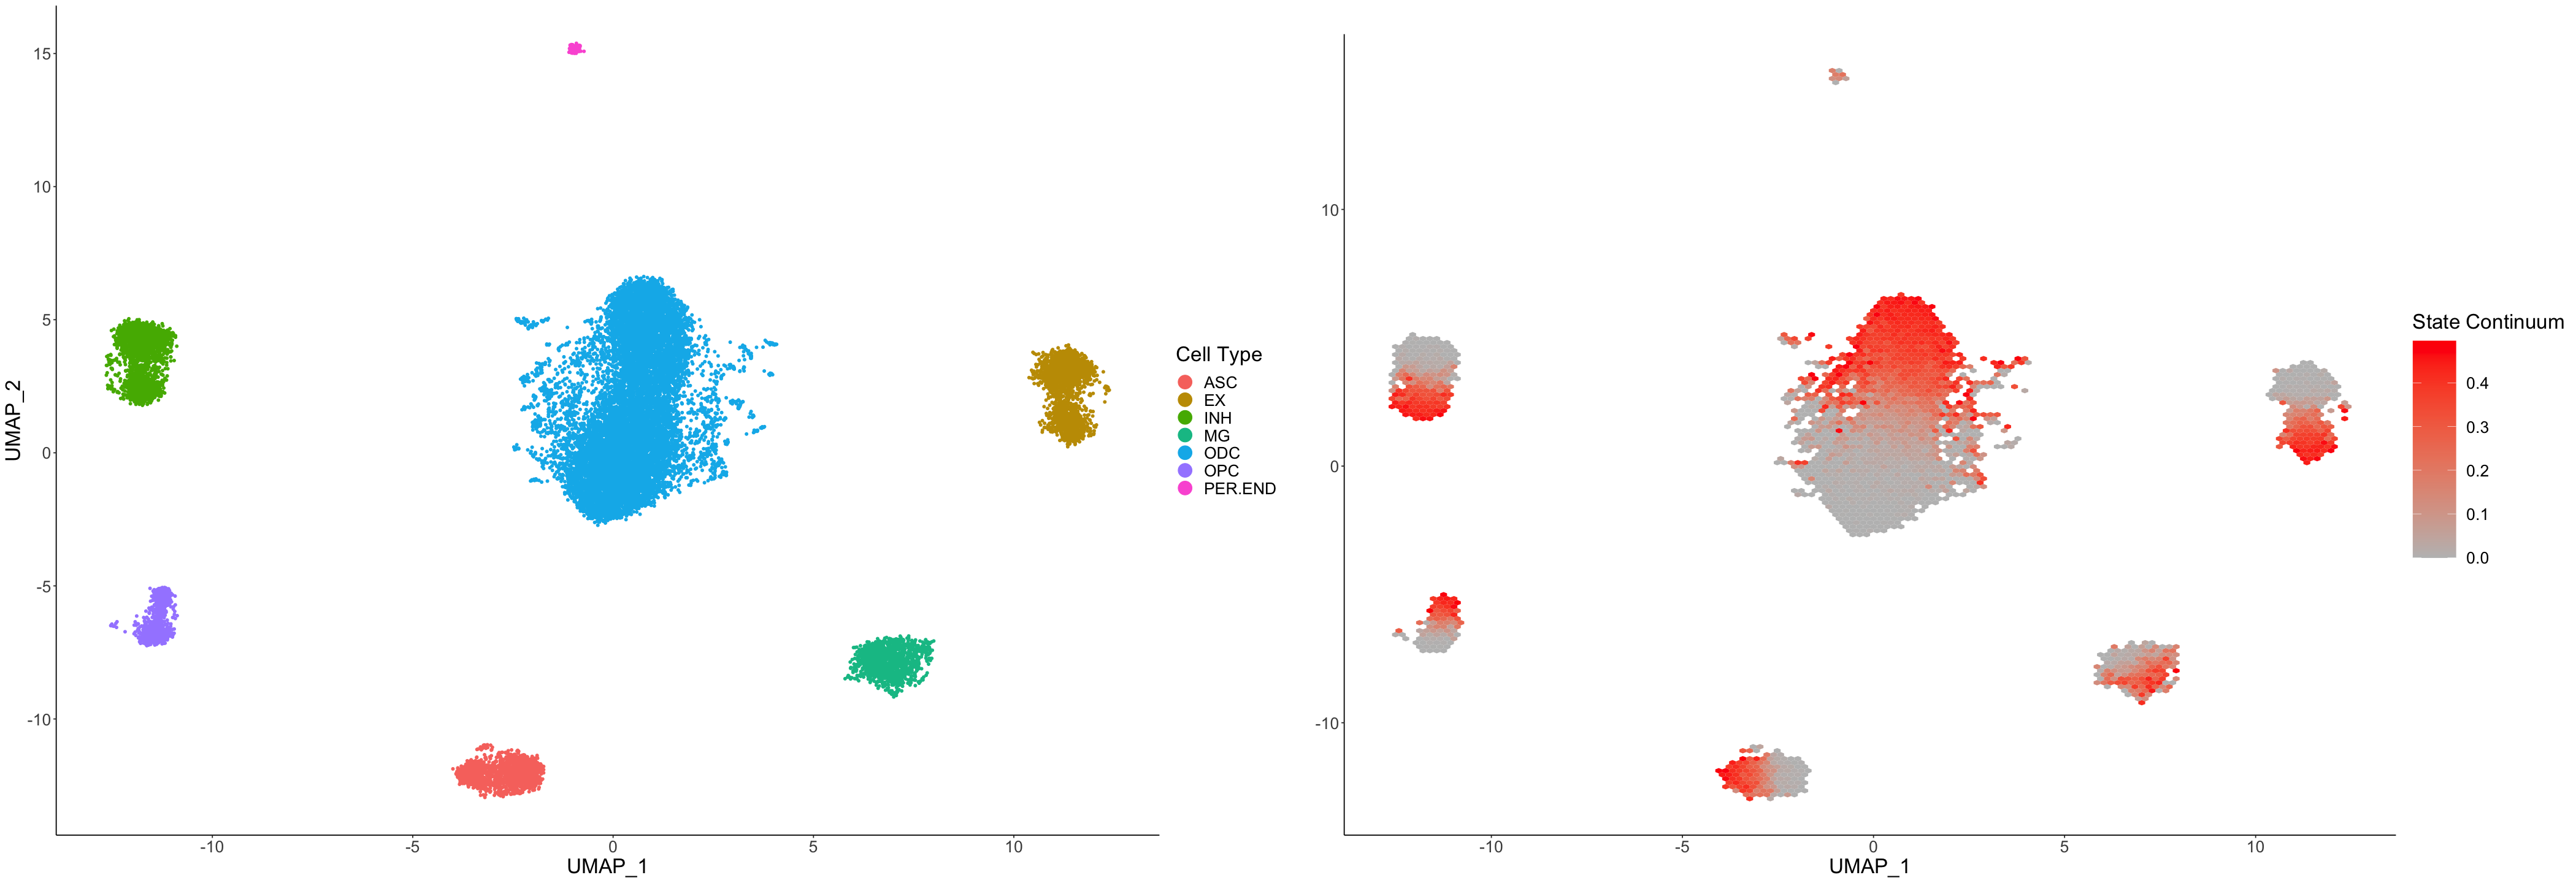

In [52]:
plot_umaps(filename = "/Users/shayecarver/condPCA/ASHG/Simulation/visualization_examples/PCA_across_cts_allcts_0.5_0.5_seed3_20000_dim30.rds")

19:09:48 UMAP embedding parameters a = 0.9922 b = 1.112

19:09:48 Converting dataframe to numerical matrix

19:09:48 Read 20000 rows and found 30 numeric columns

19:09:48 Using Annoy for neighbor search, n_neighbors = 30

19:09:48 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:09:50 Writing NN index file to temp file /var/folders/1b/d3mmyllj1jg4btvm4vqztkdh0000gp/T//Rtmpnit1Eo/file3afc60e10fcf

19:09:50 Searching Annoy index using 5 threads, search_k = 3000

19:09:51 Annoy recall = 100%

19:09:51 Commencing smooth kNN distance calibration using 5 threads
 with target n_neighbors = 30

19:09:52 Found 2 connected components, 
falling back to 'spca' initialization with init_sdev = 1

19:09:52 Using 'irlba' for PCA

19:09:52 PCA: 2 components explained 54.9% variance


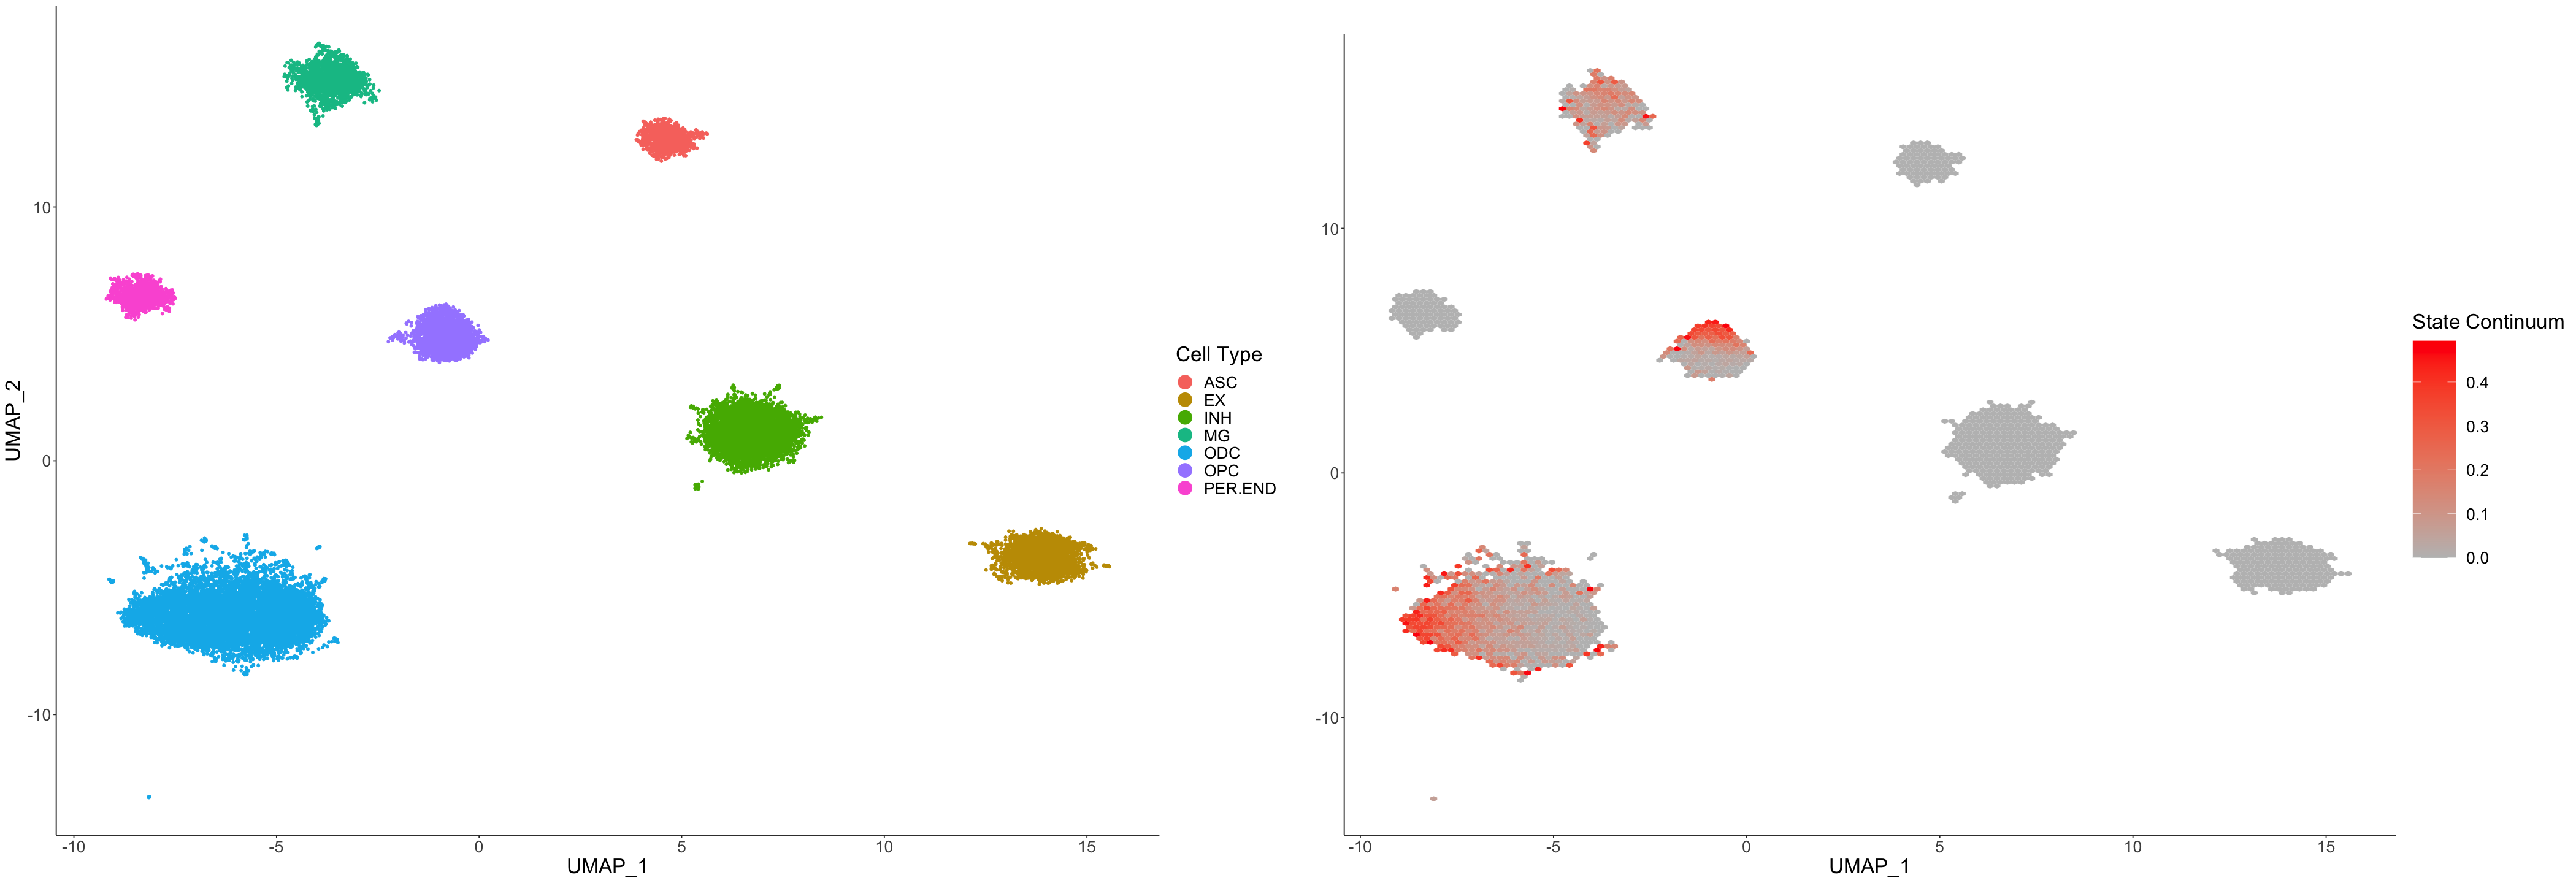

In [53]:
plot_umaps(filename = "/Users/shayecarver/condPCA/ASHG/Simulation/visualization_examples/PCA_across_cts_allcts_0.2_0.3_seed3_20000_dim30.rds")

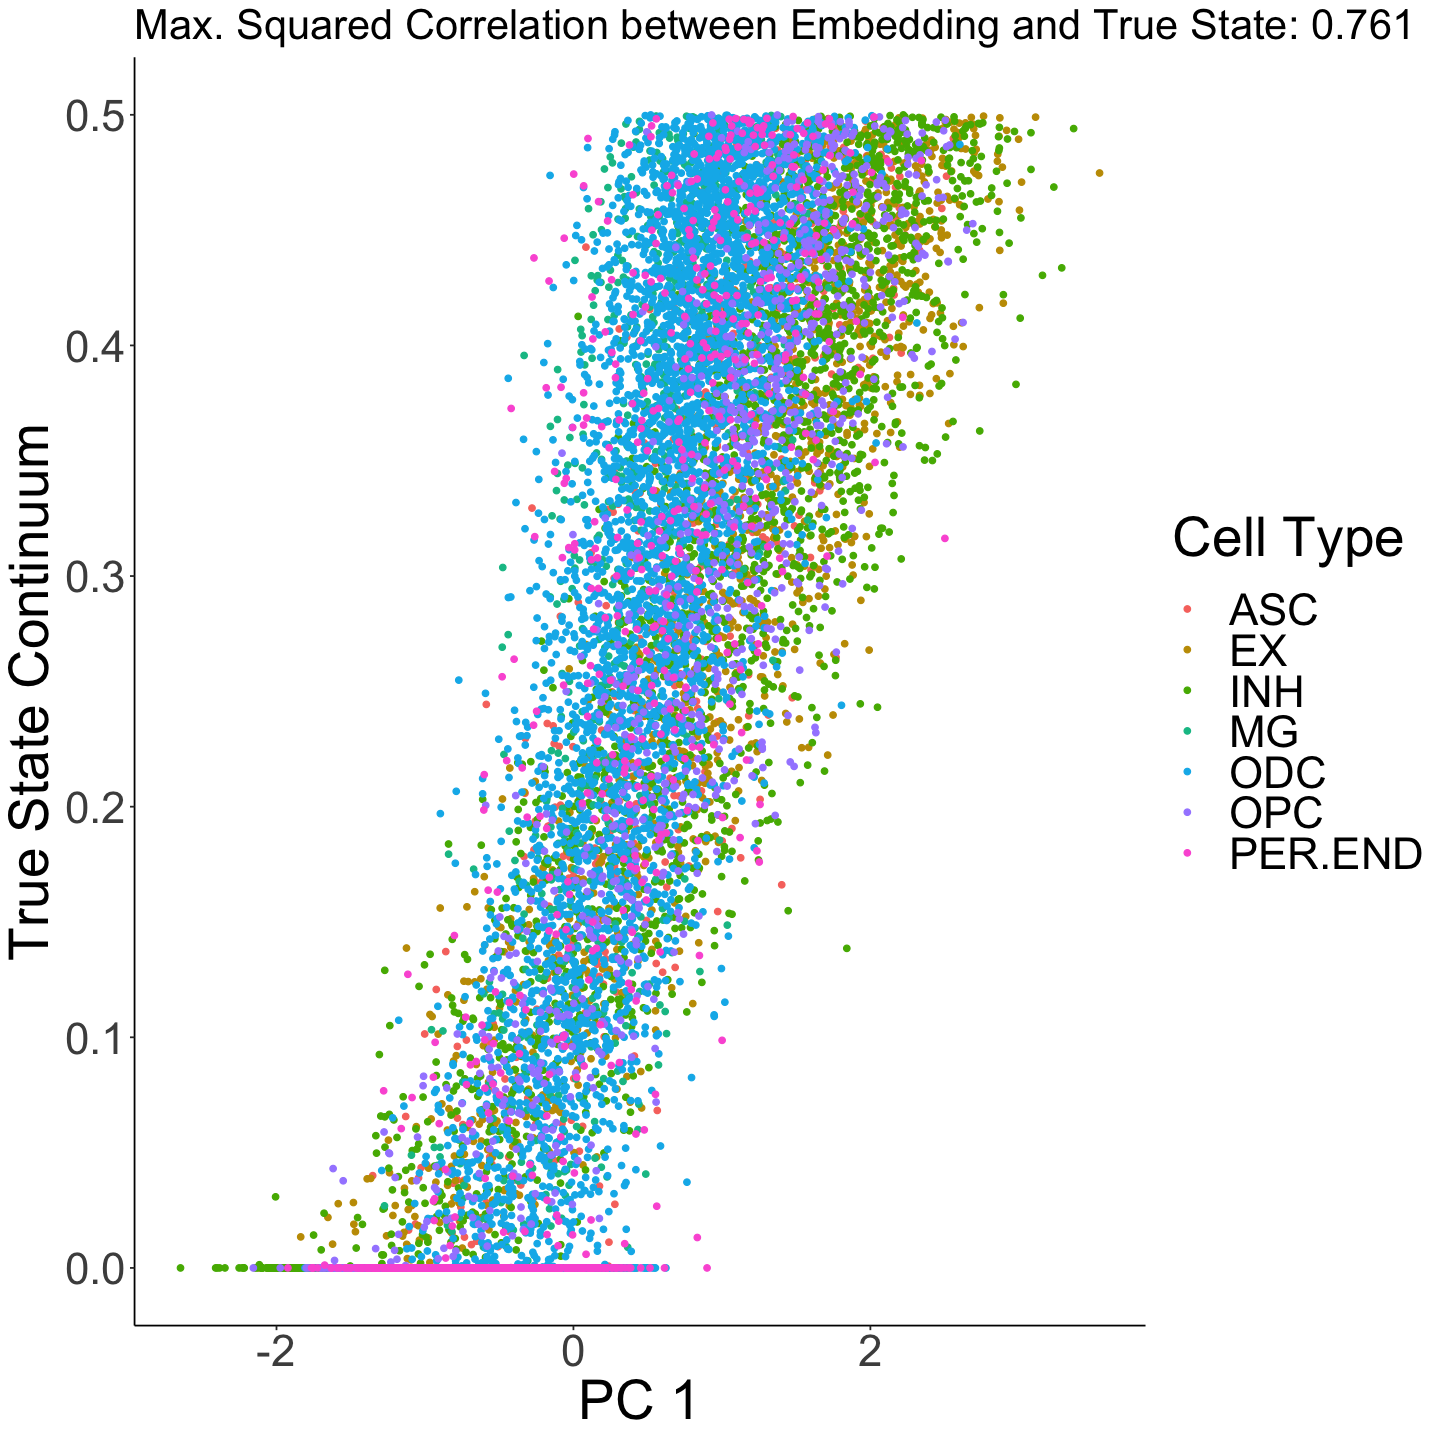

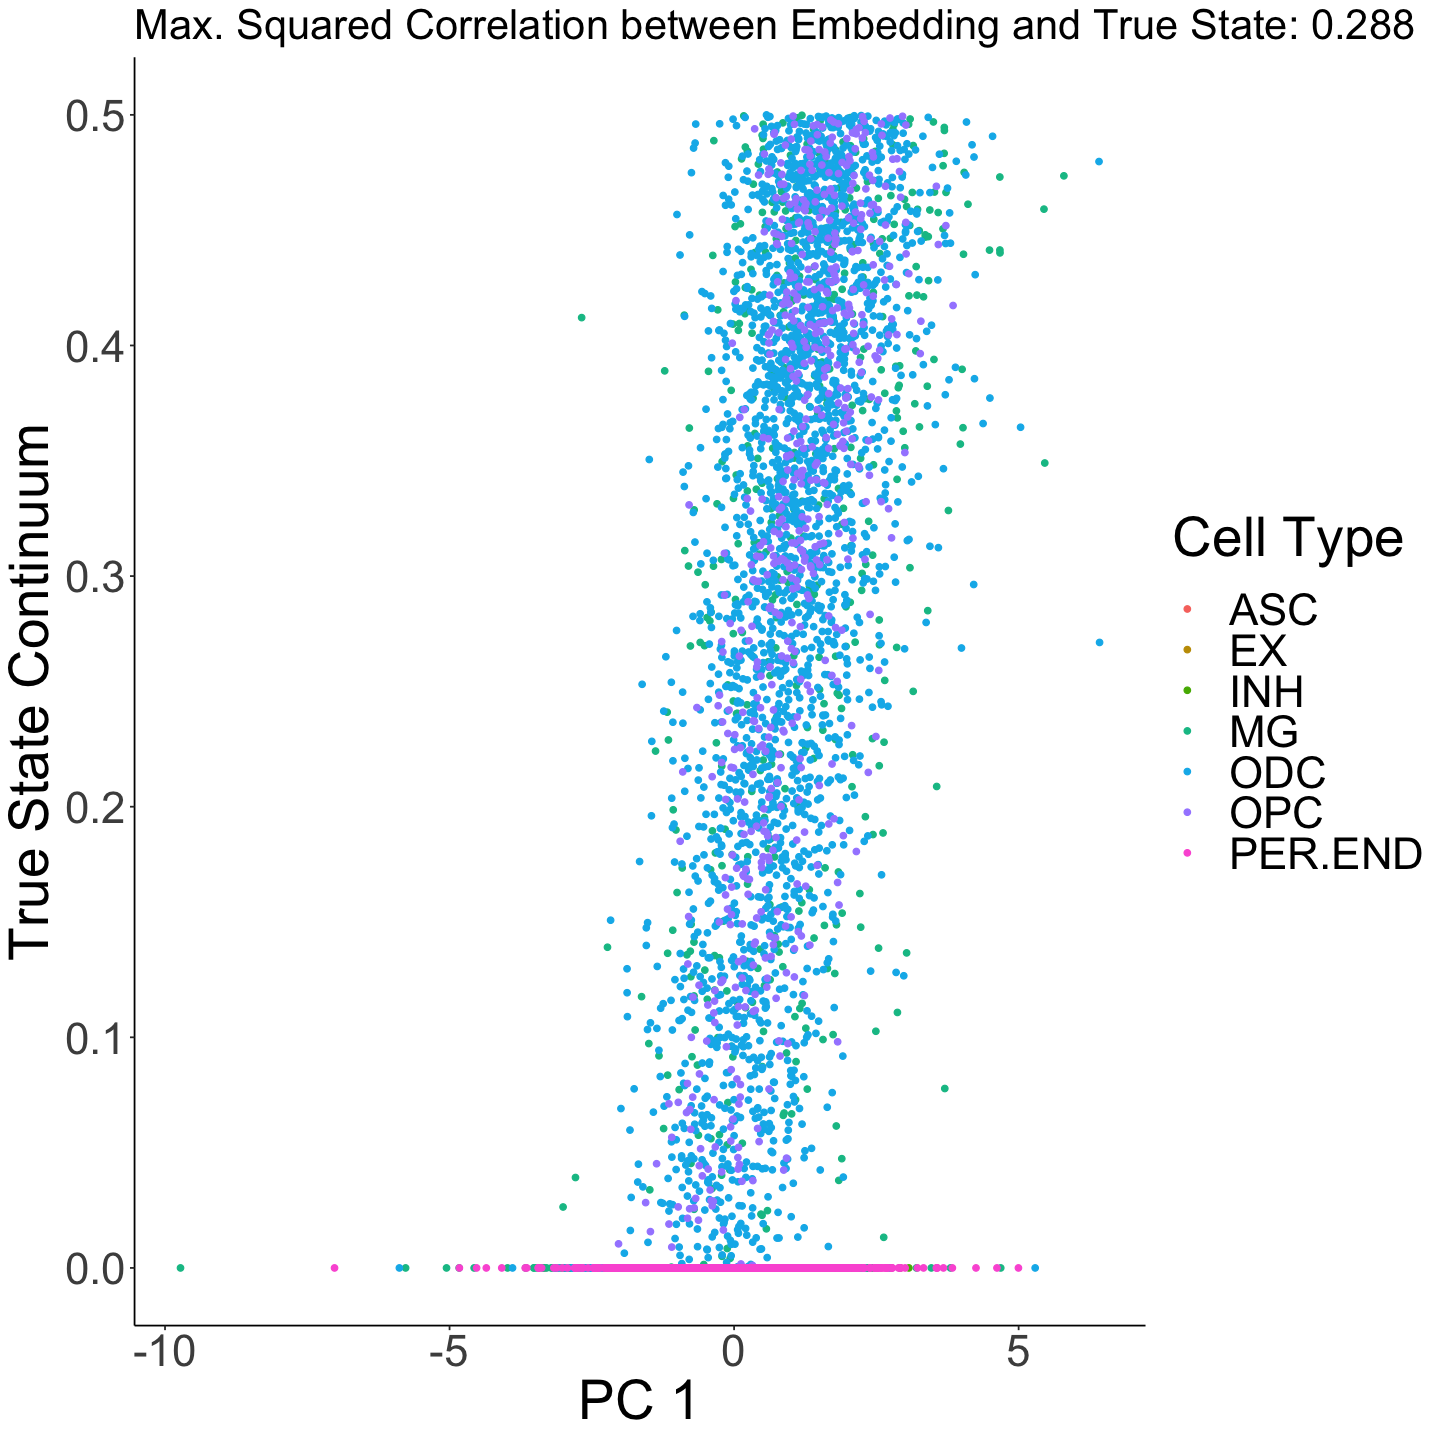

In [164]:
options(repr.plot.width=12, repr.plot.height=12)

plot_state_emb <- function(filename){
    out =readRDS(filename)
    PCA_emb = out$embeddings
    state = out$max_continuums[,"State_1"]
    ct_labels = data.frame(out$ct_labels)
    colnames(ct_labels) = "ct_label"
    corr_sq = cor(PCA_emb,state)**2
    tmp_df = cbind(data.frame(emb = scale(PCA_emb[,which(corr_sq==max(corr_sq))])), data.frame(state), ct_labels)
    tmp_df$ct_label = factor(tmp_df$ct_label)
    p = ggplot(tmp_df, aes(x = emb, y = state, color = ct_label)) +
    geom_point() + theme_classic()+labs(color="Cell Type") + ylab("True State Continuum") + xlab(glue("PC {which(corr_sq==max(corr_sq))}") ) +ggtitle(glue('Max. Squared Correlation between Embedding and True State: {round(max(corr_sq),3)}'))+theme(text = element_text(size=33),plot.title = element_text(size = 25))
    return(p)
}

p1 = plot_state_emb(filename="/Users/shayecarver/condPCA/ASHG/Simulation/visualization_examples/cond_PCA_across_cts_allcts_0.5_0.5_seed3_20000_dim30.rds")
p2 = plot_state_emb(filename="/Users/shayecarver/condPCA/ASHG/Simulation/visualization_examples/cond_PCA_across_cts_allcts_0.2_0.3_seed3_20000_dim30.rds")
p1
p2


In [152]:
filename="/Users/shayecarver/condPCA/ASHG/Simulation/visualization_examples/PCA_across_cts_allcts_0.2_0.3_seed3_20000_dim30.rds"
out =readRDS(filename)
PCA_emb = out$embeddings
state = out$max_continuums[,"State_1"]
ct_labels = data.frame(out$ct_labels)

In [155]:
max(cor(PCA_emb, state)**2)

[1] 0.07859503